In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from scipy.stats import boxcox 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [12]:
url="https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv"

ds=pd.read_csv(url)
ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
df=pd.DataFrame(ds)

The Medical Cost Personal Insurance Project dataset contains 1338 individual and unique rows with 7 variable columns include 6 independent variable and 1 dependent variable target label as charges

In [14]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [15]:
df.tail(30)

,age,sex,bmi,children,smoker,region,charges
1308,25,female,30.200,0,yes,southwest,33900.65300
1309,41,male,32.200,2,no,southwest,6875.96100
1310,42,male,26.315,1,no,northwest,6940.90985
1311,33,female,26.695,0,no,northwest,4571.41305
1312,34,male,42.900,1,no,southwest,4536.25900
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270


# Exploratory Data Analysis (EDA)

In [16]:
#checking the dimension of the dataset
df.shape

(1338, 7)

The dataset contains 1338 rows and 7 columns

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [19]:
#checking the datatypes of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Here both numerical and categorical columns are present as (int64,object,float64) in dataset

# np.nan,None,NaN,others

In [21]:
#checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df.isnull().sum().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This shows dataset include indexing range,column type,no null values,data type with counts,memory usage 

<Axes: >

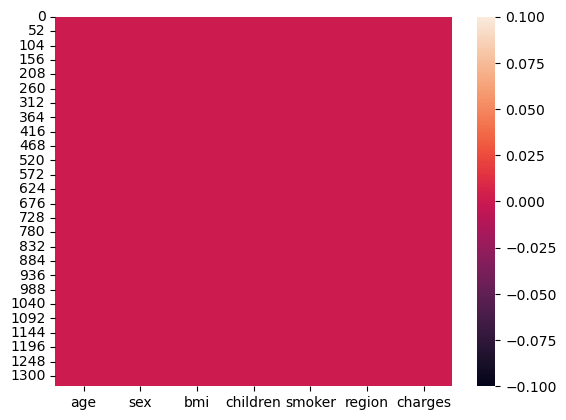

In [24]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

This map show that there is no null value present in the dataset

In [25]:
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [26]:
df["charges"].nunique()

1337

In [27]:
#checking the value count for each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")
 

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [28]:
#checking number of unique values in x dataset
df.nunique().to_frame("No.of unique value")


,No.of unique value
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


This table represent that sex,smoker,region,children has limited unique value compare to age,bmi,charges 

In [29]:
#checking the target column charges unique value
df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [30]:
#checking the target column charges unique value count
df["charges"].nunique()

1337

From this we can observe that target label 'charges' has numerical data and all the unique value so that problem can be termed as regression so to predict the charges of medical expenses on the basis of independent variable using regression model

In [31]:
# Statistical summary of numerical columns 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This gives the statistical information of the numerical columns.
The summary of dataset looks perfect as it doesnot have any null value, negative, invalid values present 
1 The count of all the columns is same as it means there is no missing values 
2 The mean median value is approx. equal in BMI,age, children as this variable means data distribution is uniform 
3 Charges column mean>median represent right skewness 

# Data Visualization

# Univariate Analysis

male      676
female    662
Name: sex, dtype: int64


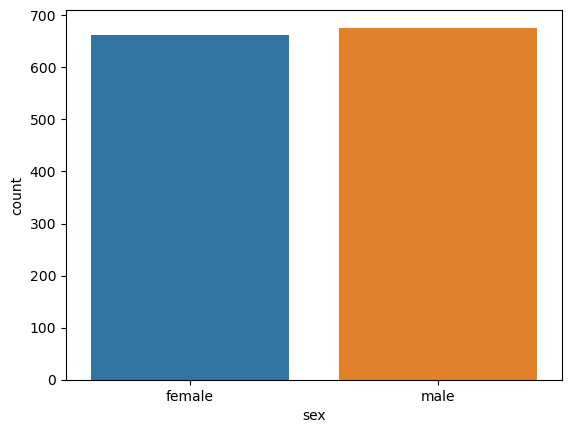

In [32]:
#Visualize the number of label target as quality

sns.countplot(x='sex',data=df)
print(df["sex"].value_counts())

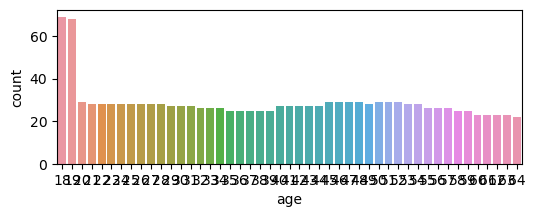

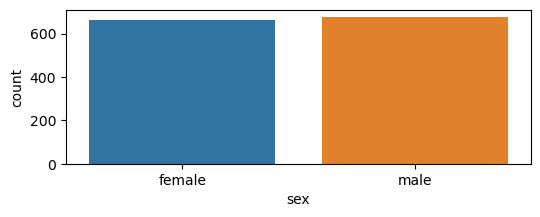

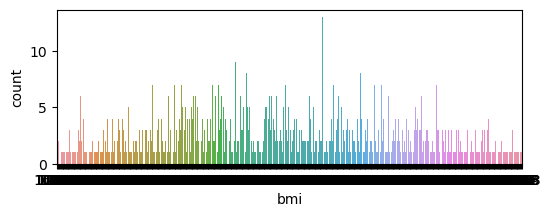

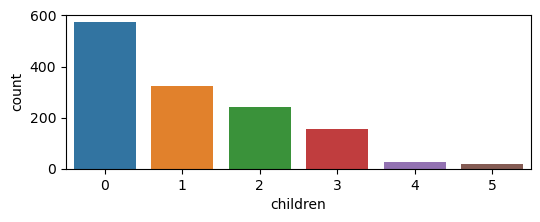

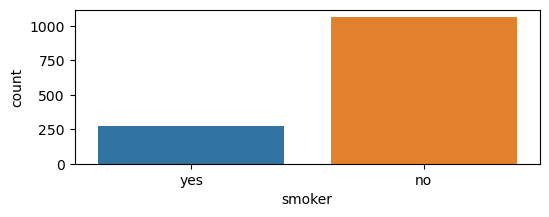

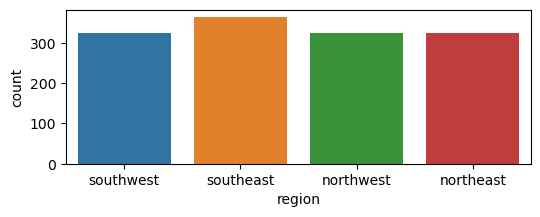

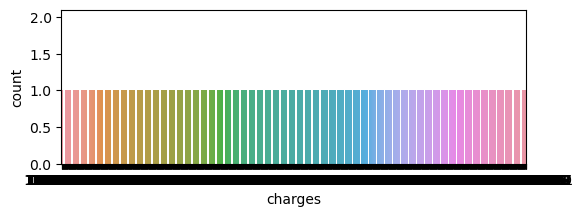

In [33]:
for i in df.columns:
    plt.figure(figsize=(6,2),facecolor="white")
    sns.countplot(x=df[i],data=df)
plt.show()

from the count plot we can understand variable like sex are approx equally distributed  all th region are equally distributed and also found biasness in children whrere 0,1,2 are high in count compare to 3,4,5 in dataset,smoker column data is also unequal , data of young people is also high compare data

# Checking the distribution of the data by using distplot

<Axes: xlabel='age', ylabel='Density'>

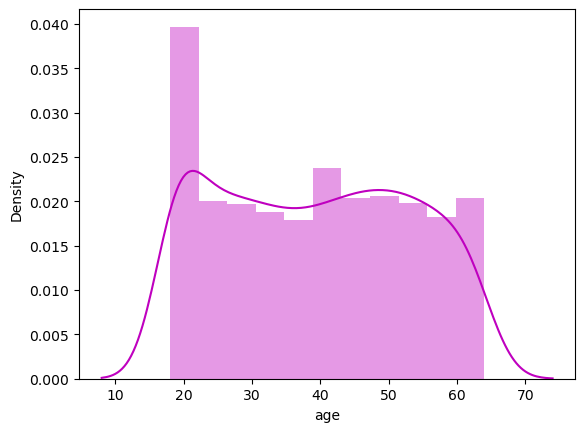

In [34]:
#Checking the distribution of the data of numerical column like age,bmi,charges by using distplot

sns.distplot(df["age"],color="m")

<Axes: xlabel='bmi', ylabel='Density'>

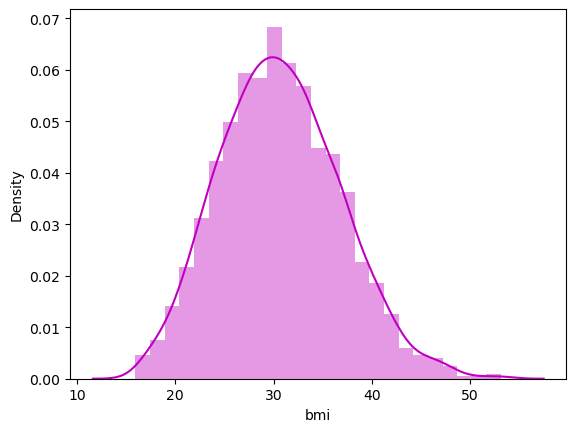

In [35]:
sns.distplot(df["bmi"],color="m")

<Axes: xlabel='children', ylabel='Density'>

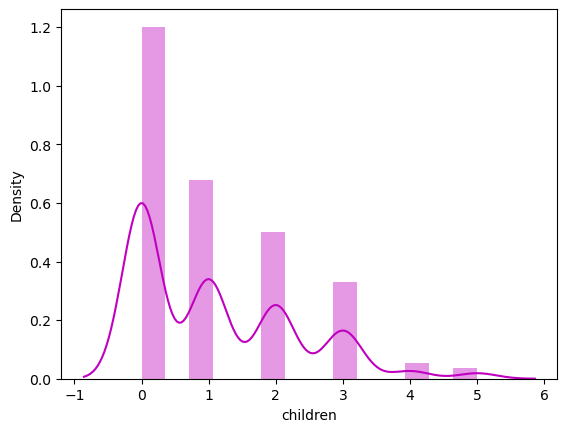

In [36]:
sns.distplot(df["children"],color="m")

<Axes: xlabel='charges', ylabel='Density'>

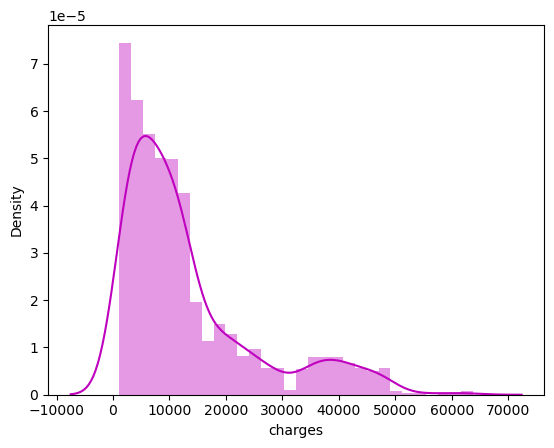

In [37]:
sns.distplot(df["charges"],color="m")

Distribution of numerical data can be seen using distplot and almost all the numerical column data is equally distributed 

In [39]:
#Separating numerical and categorical column

#Checking the categorical_columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i) 
print("Categorical Columns: ",cat_col)
print("\n")

num_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns: ",num_col)

Categorical Columns:  ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']


# Bivariate Analysis

<Figure size 600x200 with 0 Axes>

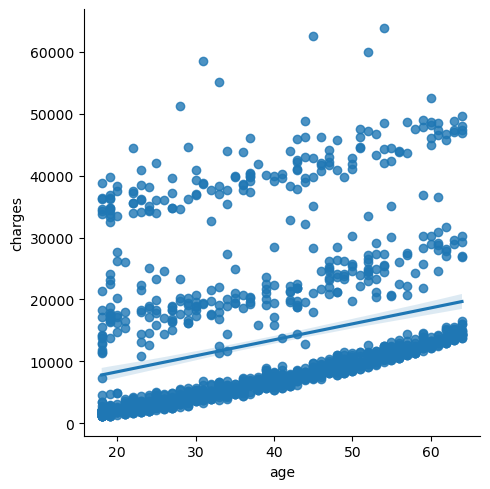

<Figure size 600x200 with 0 Axes>

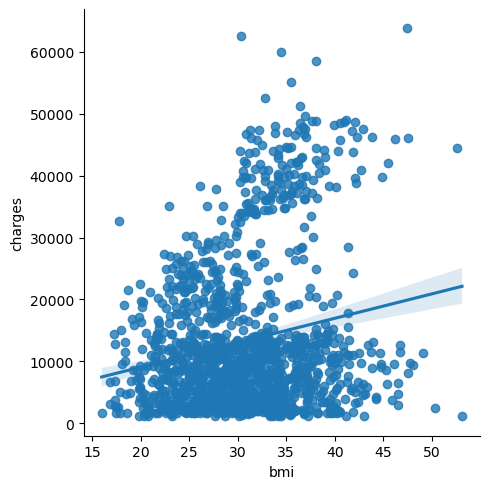

<Figure size 600x200 with 0 Axes>

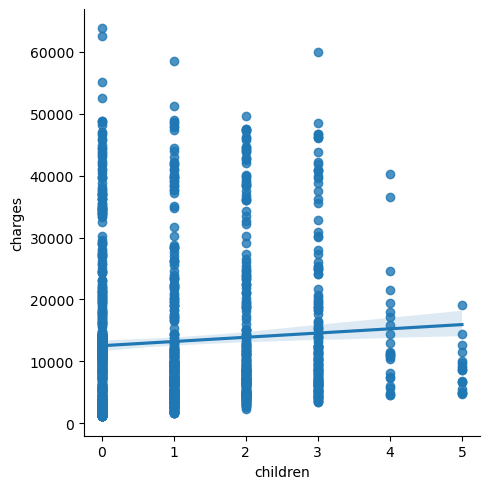

<Figure size 600x200 with 0 Axes>

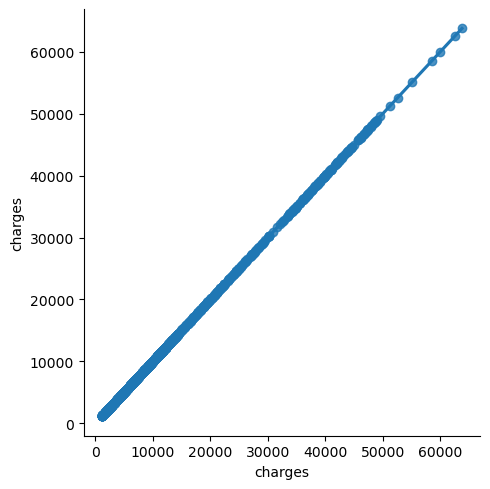

In [40]:
for i in num_col:
    plt.figure(figsize=(6,2),facecolor="white")
    sns.lmplot(x=i,y="charges",data=df,palette="colorblind")
    plt.xlabel(i)
    plt.ylabel("charges")
plt.show()

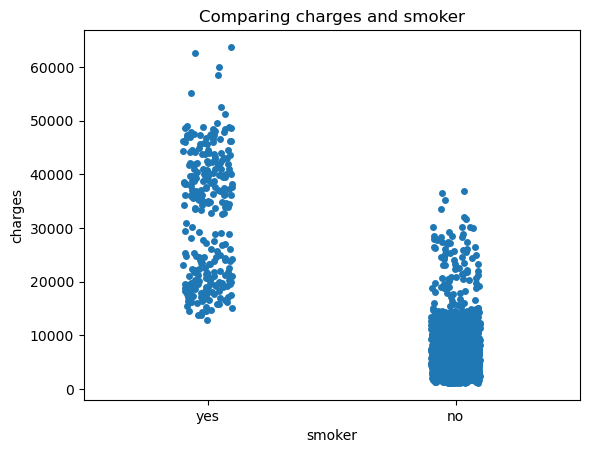

In [41]:
#comparing smoker and charges
plt.title("Comparing charges and smoker")
sns.stripplot(x='smoker', y='charges',data =df)
plt.show()

This figure show those who smoke has high charges compare to those who not smoke

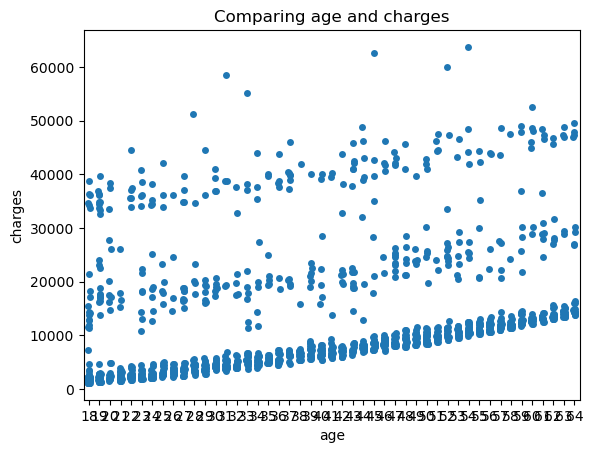

In [42]:
#comparing age and charges
plt.title("Comparing age and charges")
sns.stripplot(x='age', y='charges',data =df)
plt.show()

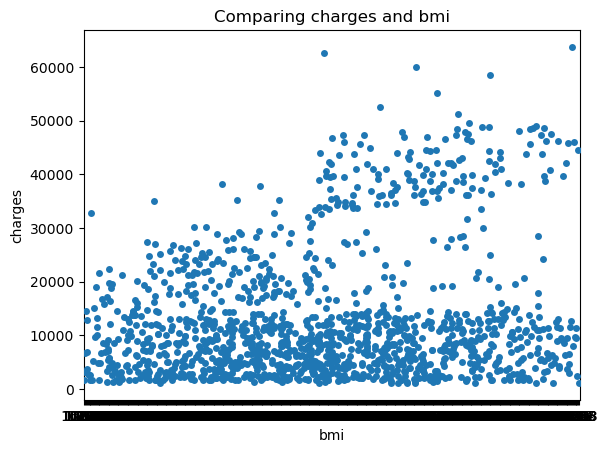

In [43]:
#comparing bmi and charges
plt.title("Comparing charges and bmi")
sns.stripplot(x='bmi', y='charges',data =df)
plt.show()

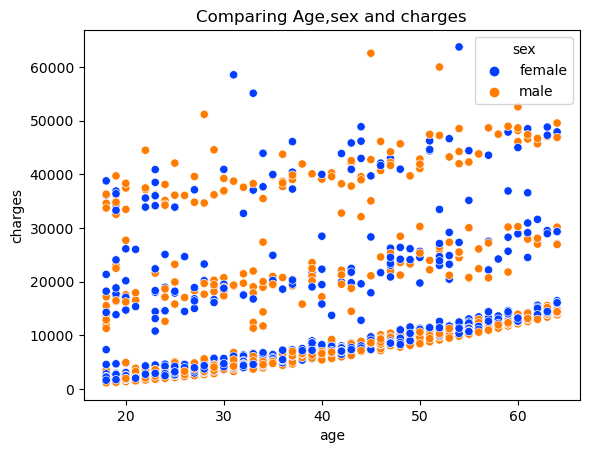

In [44]:
#Comparing Age,sex and charges
plt.title("Comparing Age,sex and charges")
sns.scatterplot(x="age",y="charges",data=df,hue="sex",palette="bright")
plt.show()

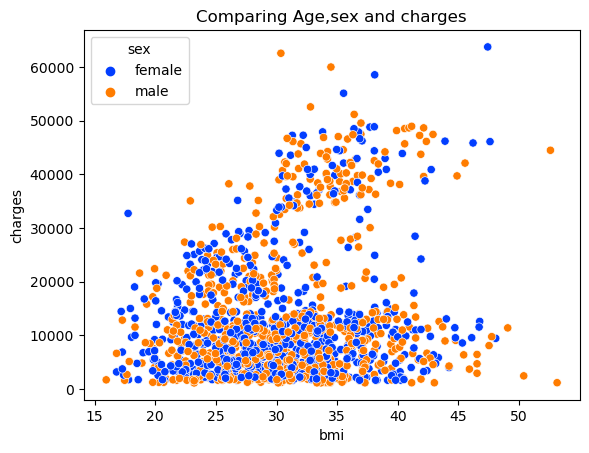

In [45]:
#Comparing bmi charges and sex
plt.title("Comparing Age,sex and charges")
sns.scatterplot(x="bmi",y="charges",data=df,hue="sex",palette="bright")
plt.show()

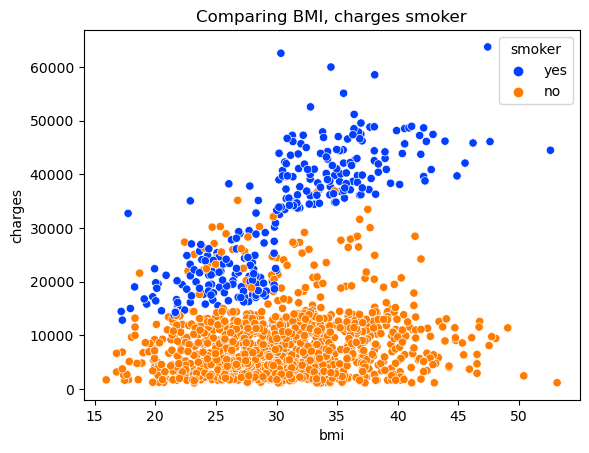

In [46]:
#Comparing BMI, charges smoker
plt.title("Comparing BMI, charges smoker")
sns.scatterplot(x="bmi",y="charges",data=df,hue="smoker",palette="bright")
plt.show()

No smoker has low charges with increase BMI as we evaluate  that increase in bmi with no smokker has no effect on charges where person who smoke with increase in BMI have high charges

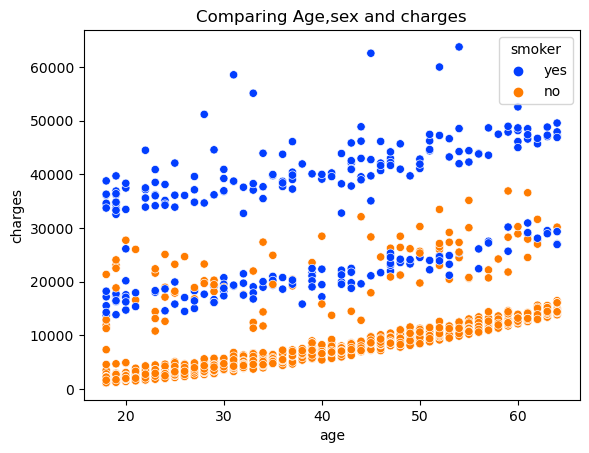

In [47]:
#Comparing Age,sex and charges
plt.title("Comparing Age,sex and charges")
sns.scatterplot(x="age",y="charges",data=df,hue="smoker",palette="bright")
plt.show()

Charges increase with smoker and  age 

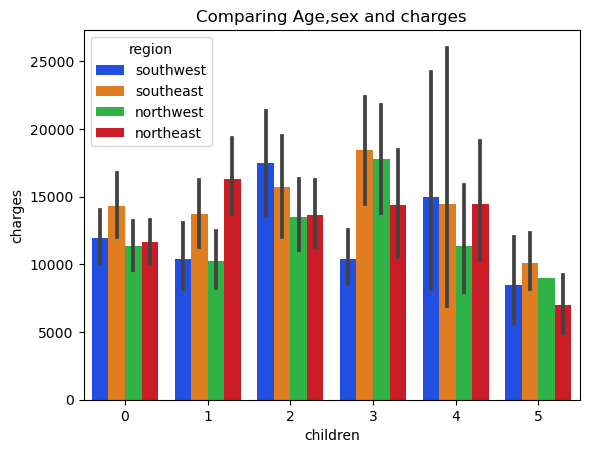

In [48]:
#Comparing children charges and region
plt.title("Comparing Age,sex and charges")
sns.barplot(x="children",y="charges",data=df,hue="region",palette="bright")
plt.show()

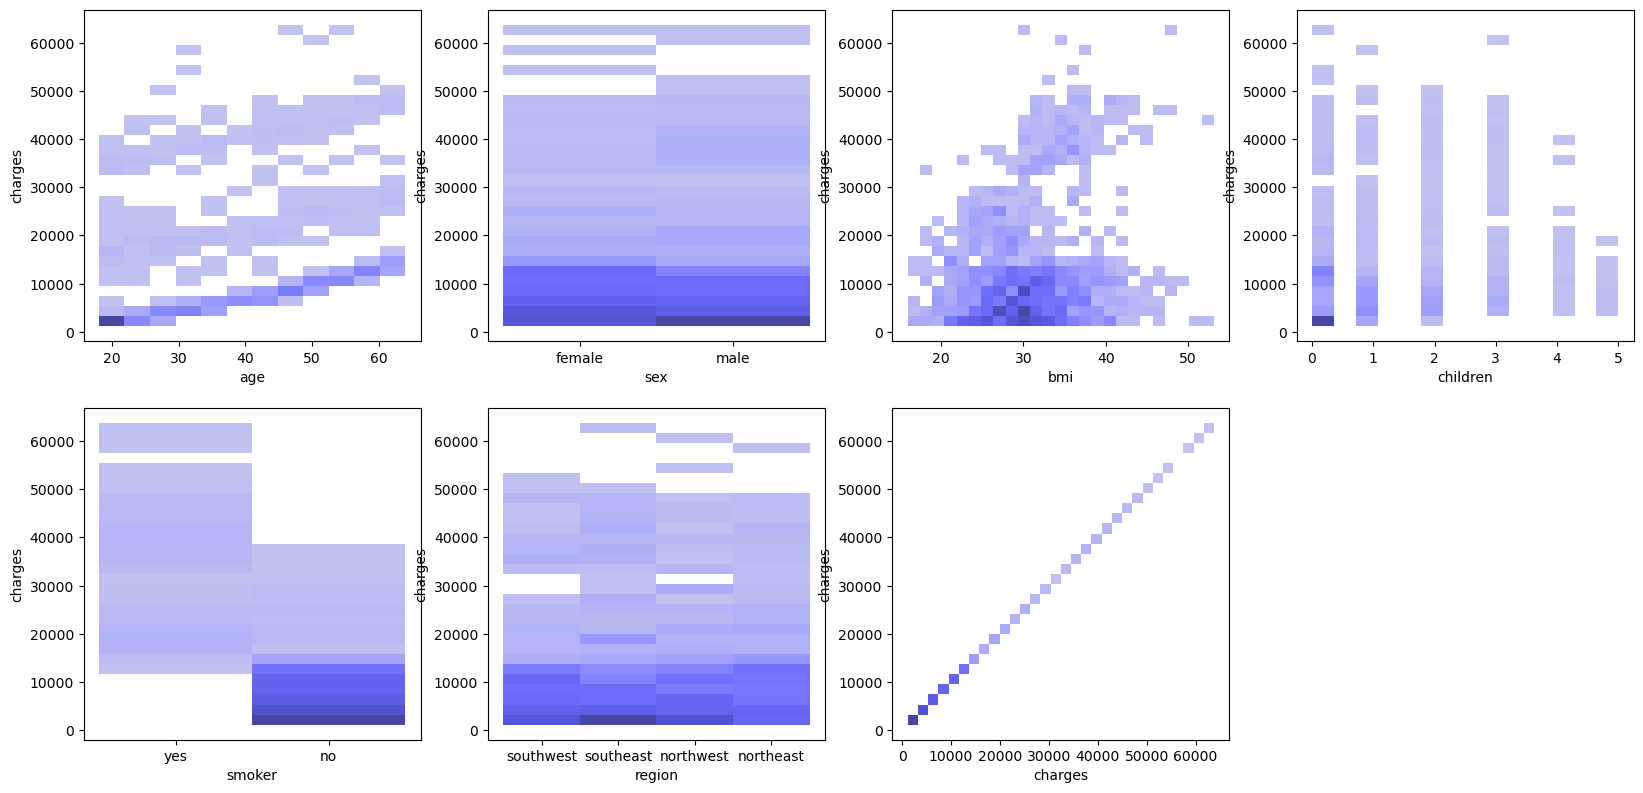

In [49]:
#Comparing charges with other columns using histplot plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=7:
        plt.subplot(5,4,p)
        sns.histplot(x=i,y="charges", data =df,color='b')
        plt.xlabel(i)
        plt.ylabel("charges")
    p+=1
plt.show()

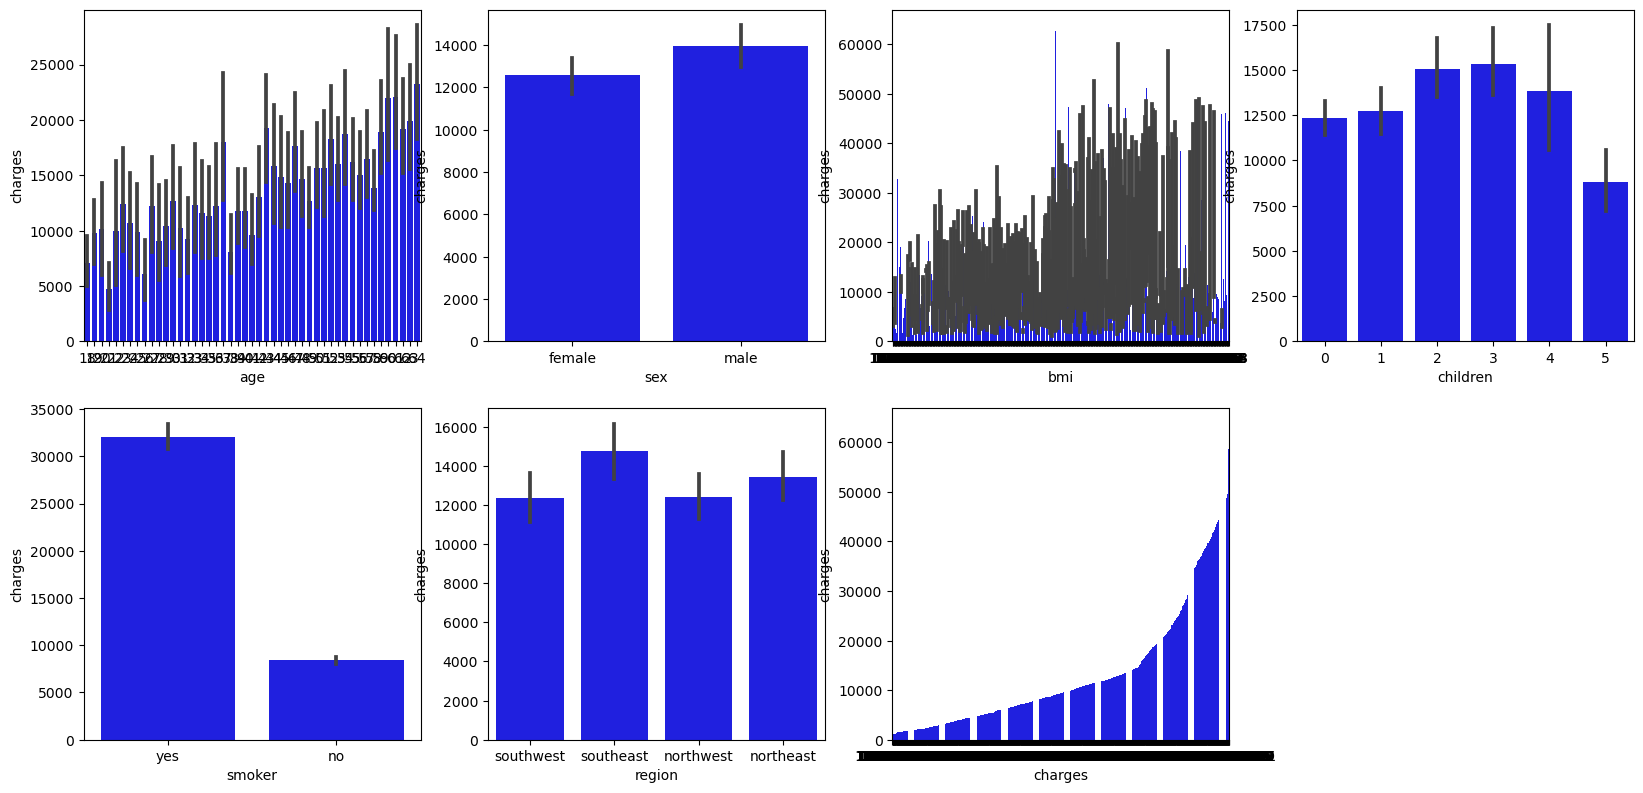

In [50]:
#Comparing charges with other columns using barplot plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=7:
        plt.subplot(5,4,p)
        sns.barplot(x=i,y="charges", data =df,color='b')
        plt.xlabel(i)
        plt.ylabel("charges")
    p+=1
plt.show()

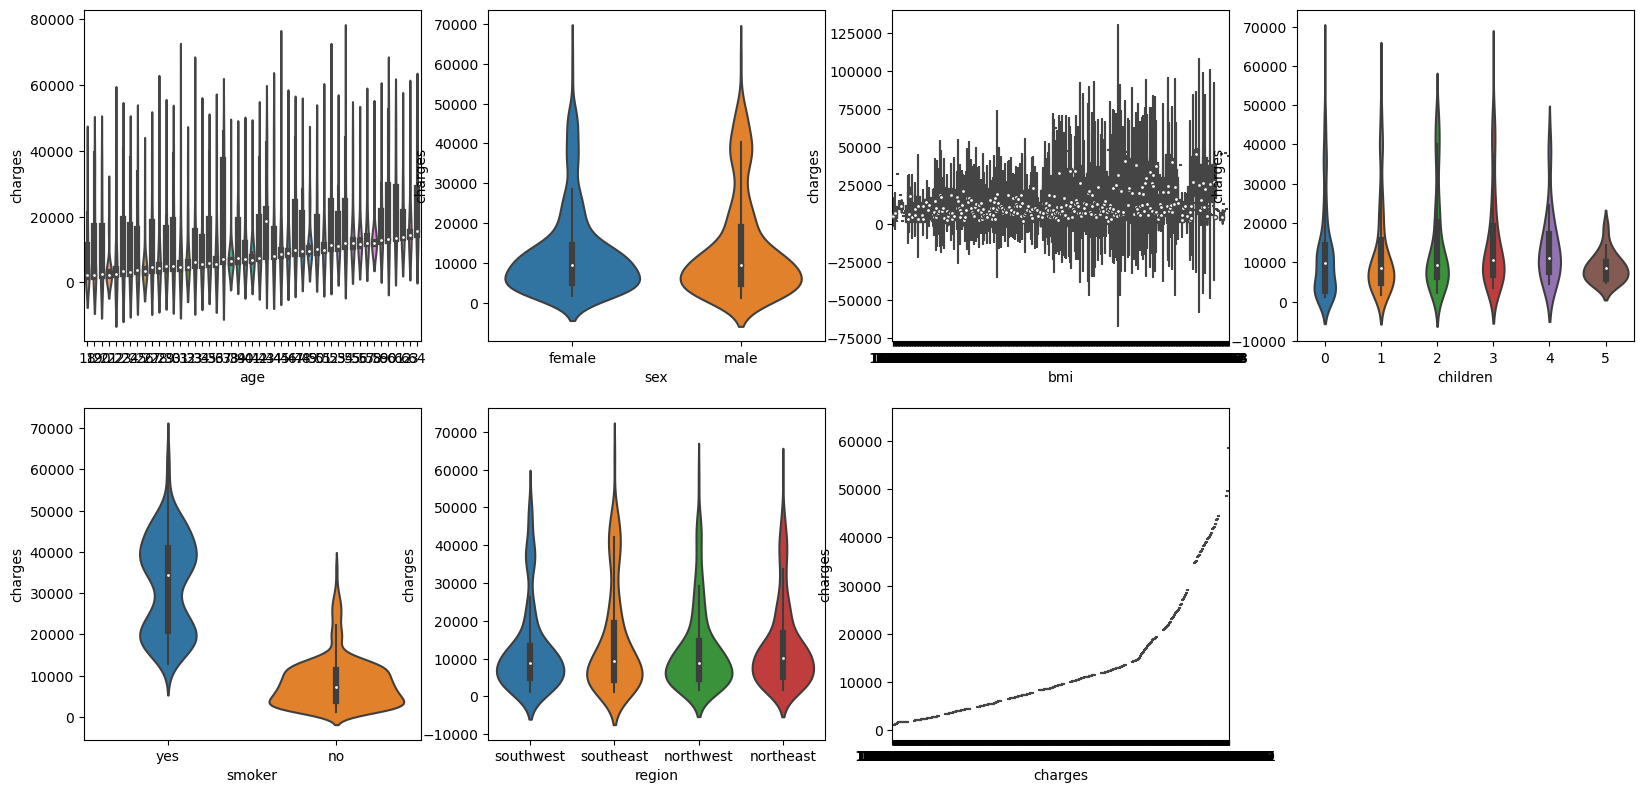

In [51]:
#Comparing charges with other columns using Violin plot to find any relationship 
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=7:
        plt.subplot(5,4,p)
        sns.violinplot(x=i,y="charges", data =df)
        plt.xlabel(i)
        plt.ylabel("charges")
    p+=1
plt.show()

charges remain unaffected with all the column except for smoker

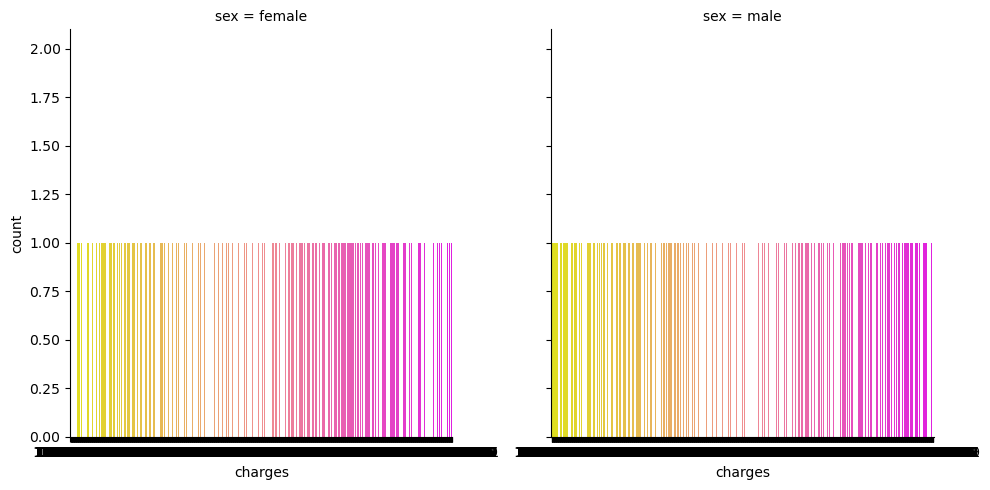

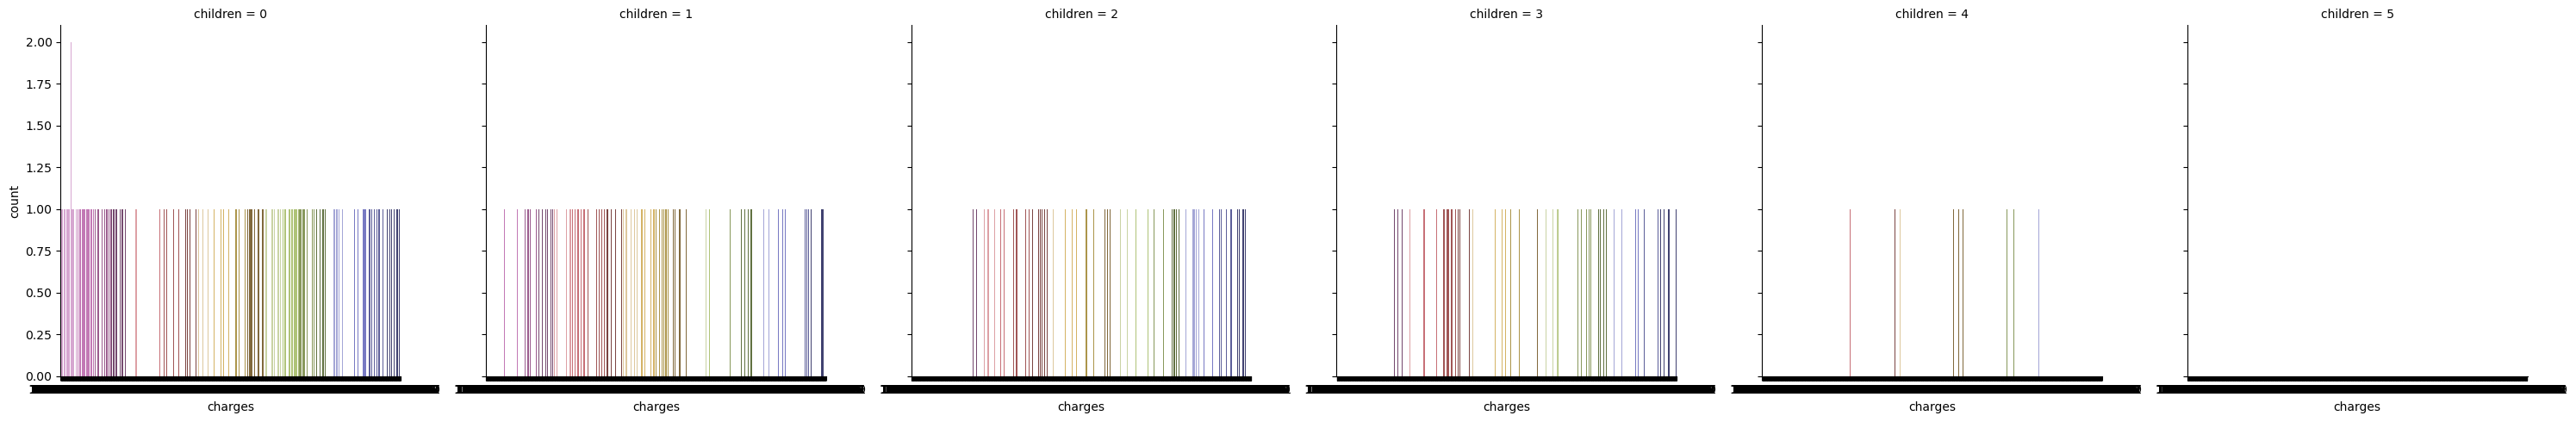

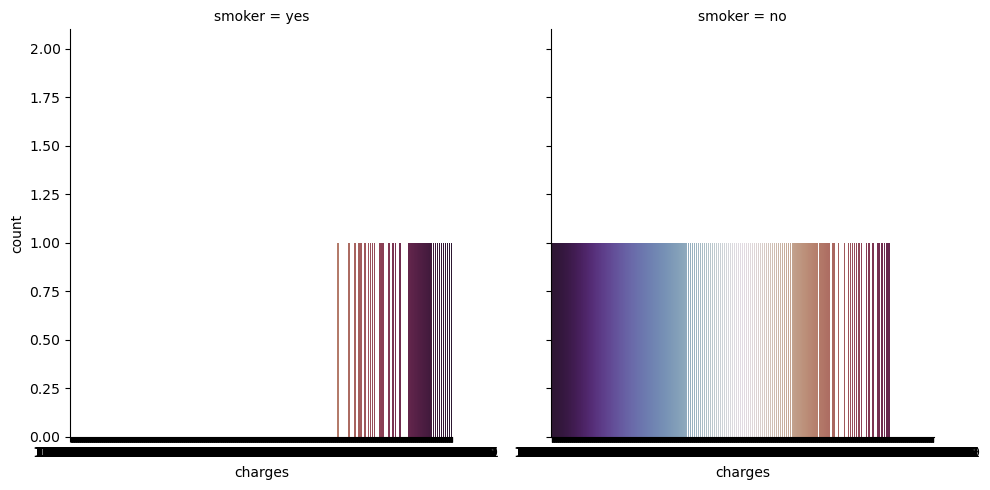

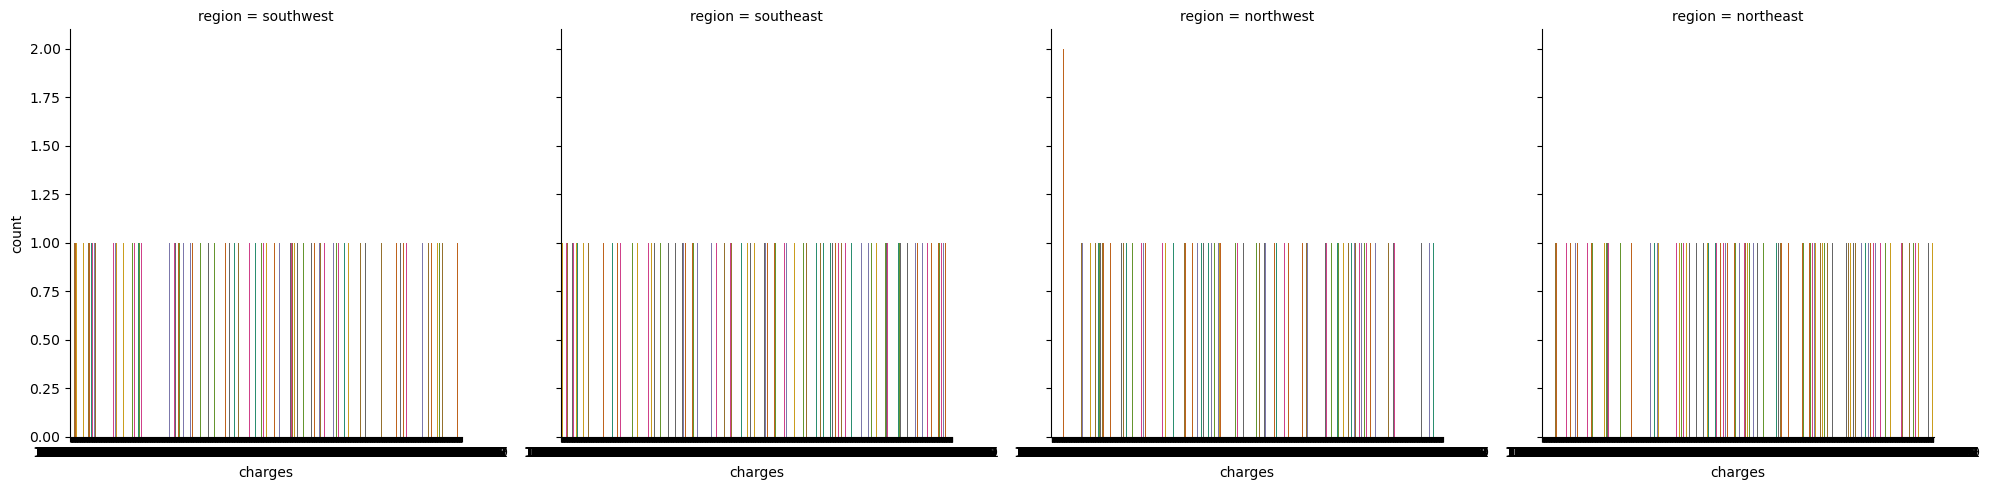

In [52]:
#Checking the charges level with sex, children,smoker,region

sns.catplot(x="charges",col="sex",data =df, kind="count",palette="spring_r")

sns.catplot(x="charges",col="children",data =df, kind="count",palette="tab20b_r")

sns.catplot(x="charges",col="smoker",data =df, kind="count",palette="twilight_shifted")


sns.catplot(x="charges",col="region",data =df, kind="count",palette="Dark2")

# Multivariate analyis

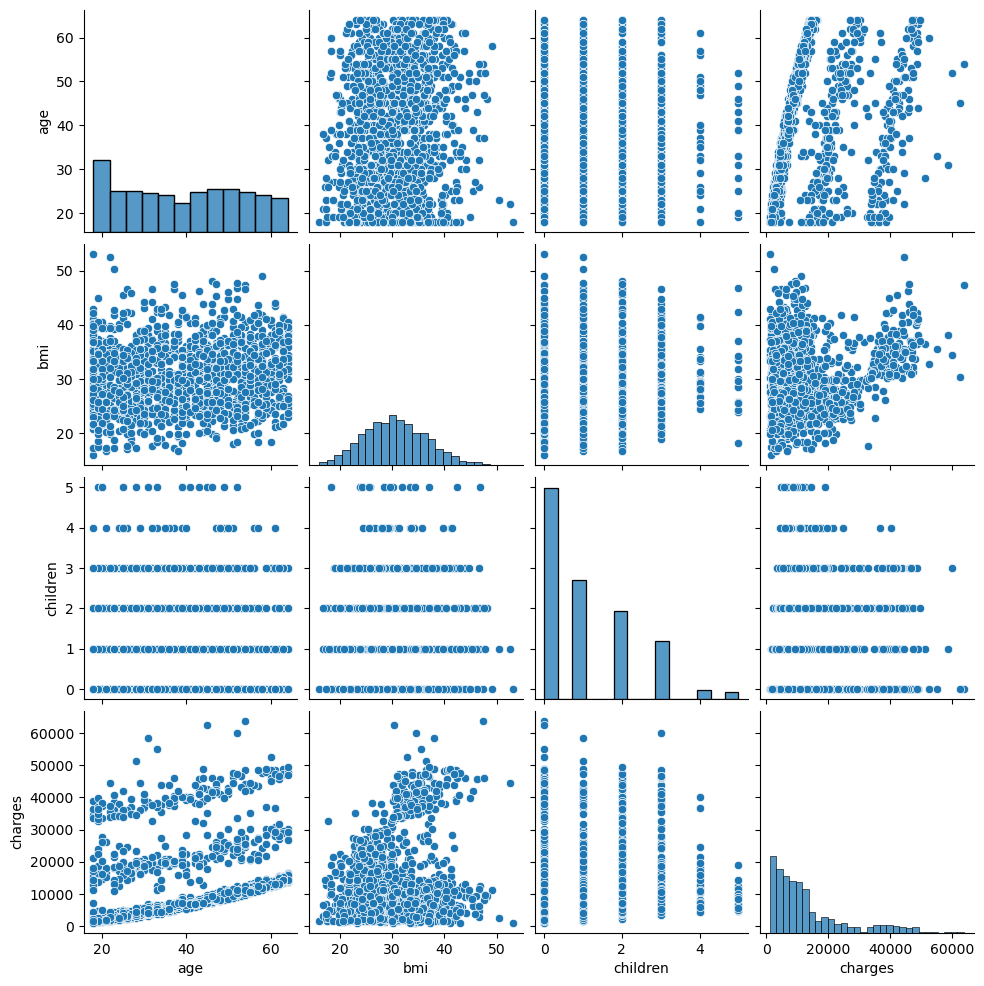

In [53]:
sns.pairplot(df)

In [87]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Assuming "sex", "smoker", and "region" are the columns you want to encode
columns_to_encode = ["sex", "smoker", "region"]

# Apply LabelEncoder to each of the selected columns
for col in columns_to_encode:
    df[col] = LE.fit_transform(df[col])

# Now, df contains the encoded values for the selected columns


df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Checking for Outliers

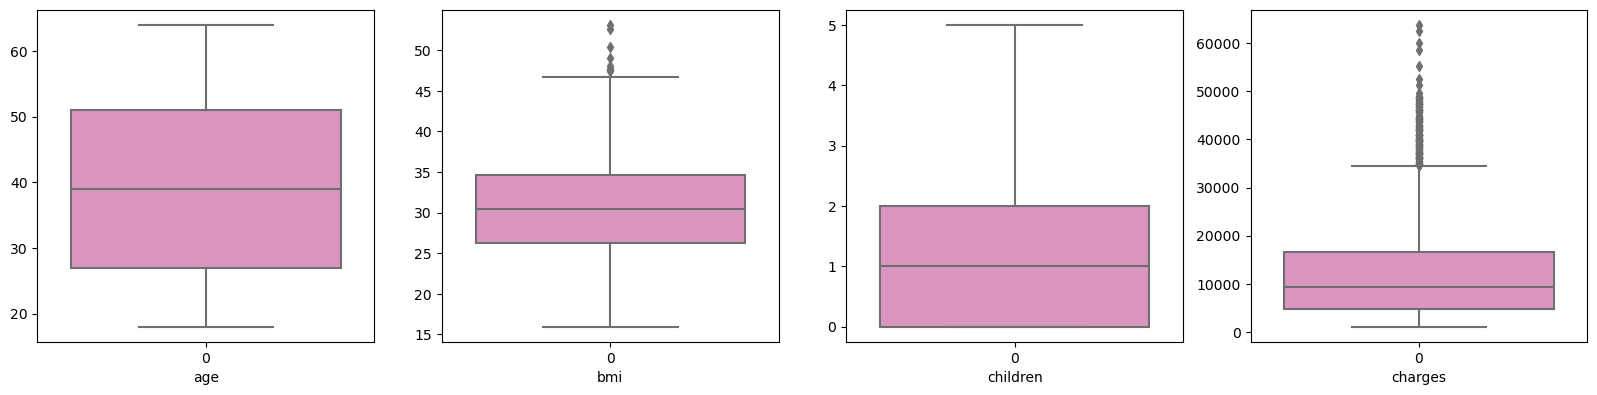

In [54]:
#Checking for Outliers using boxplot
plt.figure(figsize=(20,25))
p=1
for i in num_col:
    if p<=7:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette = "Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

found BMI has outliers and charges but charges is target variable so no need to remove

In [88]:
from scipy.stats import zscore

new_df=df.iloc[:,:]
z=np.abs(zscore(new_df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [89]:
# threshold =3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [90]:
df_med=new_df[(z<3).all(axis=1)]

In [91]:
df_med.shape

(1309, 7)

In [92]:
df.shape

(1338, 7)

In [93]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   int64  
 1   sex       1309 non-null   int64  
 2   bmi       1309 non-null   float64
 3   children  1309 non-null   int64  
 4   smoker    1309 non-null   int64  
 5   region    1309 non-null   int64  
 6   charges   1309 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 81.8 KB


# correlation between target variable and independent variables

In [94]:
cor=df_med.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019253,0.118178,0.059100,-0.029090,0.003121,0.305263
sex,-0.019253,1.000000,0.042498,0.014056,0.079058,0.003084,0.059455
bmi,0.118178,0.042498,1.000000,0.029916,-0.005288,0.160126,0.191453
children,0.059100,0.014056,0.029916,1.000000,0.028844,-0.002976,0.100438
smoker,-0.029090,0.079058,-0.005288,0.028844,1.000000,-0.003474,0.785129
region,0.003121,0.003084,0.160126,-0.002976,-0.003474,1.000000,-0.007633
charges,0.305263,0.059455,0.191453,0.100438,0.785129,-0.007633,1.000000


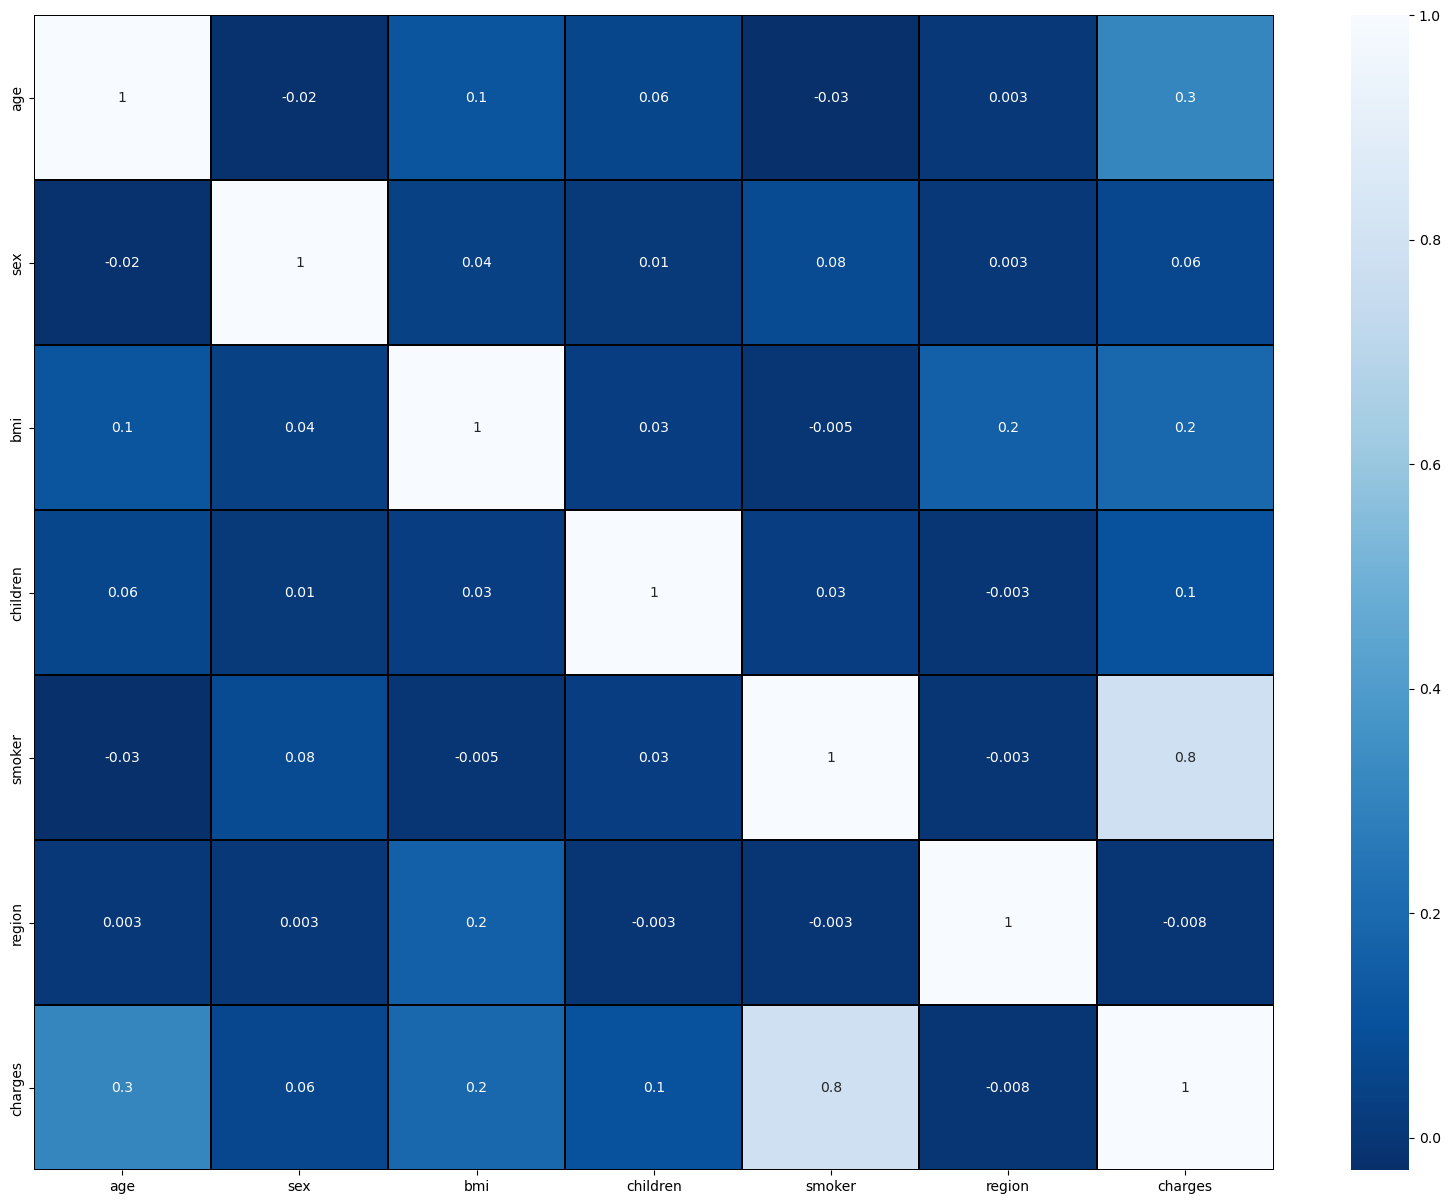

In [95]:

plt.figure(figsize = (20,15))
sns.heatmap(df_med.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.show()

0 - no relation,0.3 to +0.3 less corelation, greater thab -0.5 to +0.5 moderate corelation, greater than -0.7 to +0.7 is high correlation
This heatmap shows the correlation matrix by visualizing the data. we can observe relation b/w feature to feature and feature to label This heatmap contains both negative and positive correlation 

In [96]:
cor['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.785129
age         0.305263
bmi         0.191453
children    0.100438
sex         0.059455
region     -0.007633
Name: charges, dtype: float64

# Visualizing the correlation between label and features using bar plot

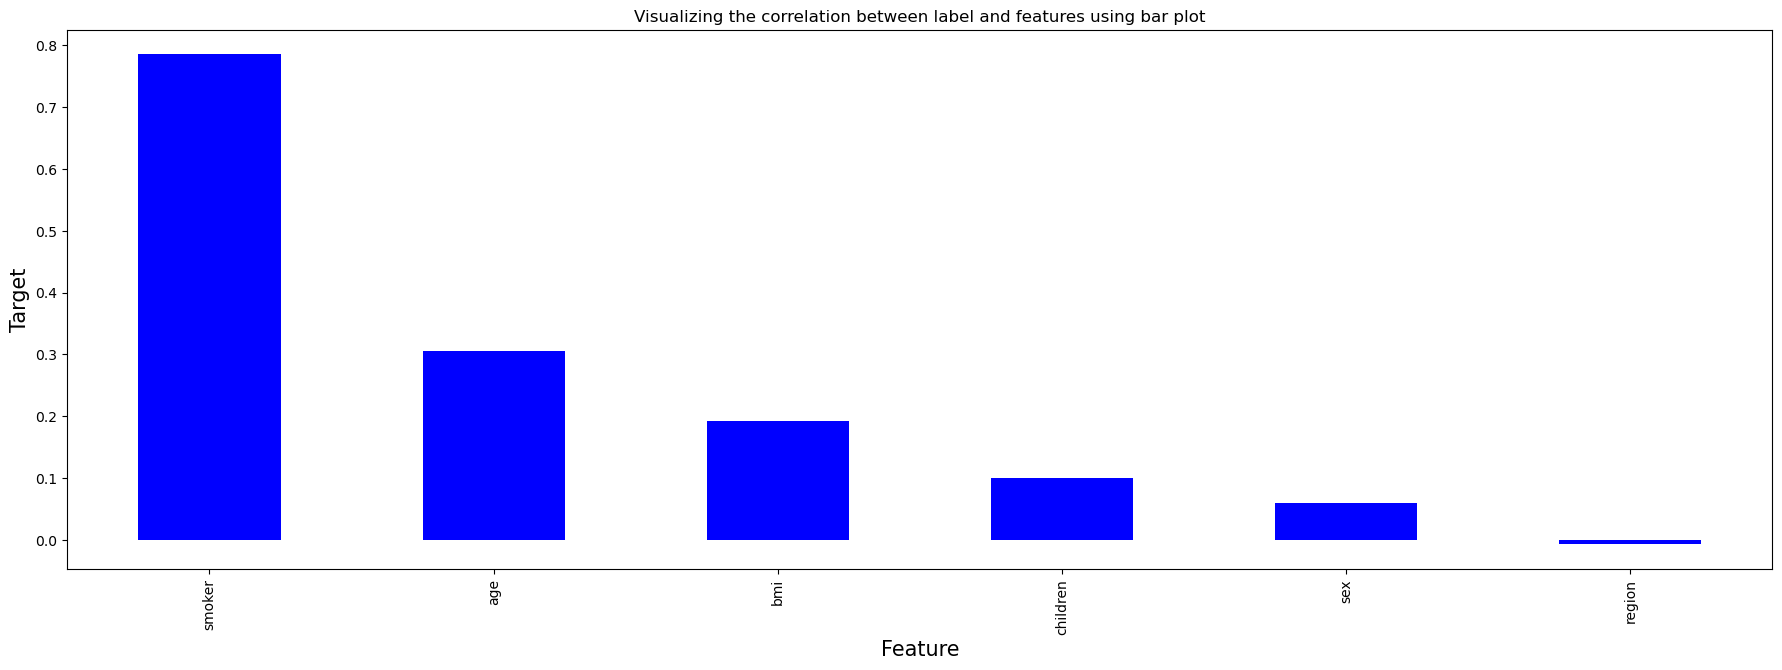

In [97]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
df_med.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Visualizing the correlation between label and features using bar plot')
plt.show()

smoker has highest impact after age bmi

In [98]:
# Separating features and label

x=df_med.iloc[:,:-1]
y=df_med.iloc[:,-1]

# Feature Scaling using Standard Scalarization

In [99]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x=pd.DataFrame(SS.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439063,-1.005362,-0.449359,-0.929616,1.984848,1.352753
1,-1.510086,0.994667,0.533391,-0.040093,-0.503817,0.447460
2,-0.799859,0.994667,0.404478,1.738954,-0.503817,0.447460
3,-0.444746,0.994667,-1.319101,-0.929616,-0.503817,-0.457833
4,-0.515769,0.994667,-0.285288,-0.929616,-0.503817,-0.457833
...,...,...,...,...,...,...
1304,0.762639,0.994667,0.064617,1.738954,-0.503817,-0.457833
1305,-1.510086,-1.005362,0.223666,-0.929616,-0.503817,-1.363127
1306,-1.510086,-1.005362,1.049041,-0.929616,-0.503817,0.447460
1307,-1.297018,-1.005362,-0.800939,-0.929616,-0.503817,1.352753


# Checking Variance Inflation Factor(VIF)

In [100]:
# Finding variance inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,1.019082,age
1,1.008815,sex
2,1.043841,bmi
3,1.005176,children
4,1.007983,smoker
5,1.026656,region


cannot drop any column as has only limited variable for model

# Modelling

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state= i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=r2_score(y_test,predLR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu,"at random_state", maxRS)

Best accuracy is  0.8163956888560486 at random_state 27


In [107]:
print("Mean absolute error",mean_absolute_error(y_test,predLR))
print("Mean squared error",mean_squared_error(y_test,predLR))

print("Root mean squared error",np.sqrt(mean_squared_error(y_test,predLR)))

Mean absolute error 11565.875007687033
Mean squared error 246717651.10109025
Root mean squared error 15707.248361857983


In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

# Regresion Algorithms

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Decision Tree Regression
DT= DecisionTreeRegressor()
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
r2_score(y_test,predDT)




0.68278662881053

In [112]:
#Checking for random forest regressor
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
predRFR =RFR.predict(x_test)
mse= mean_squared_error(y_test, predRFR)
print("Random Forest Regression Mean Squared Error:", mse)
r2_score(y_test,predRFR)

Random Forest Regression Mean Squared Error: 13710789.485308792


0.9022132639732933

In [116]:
#checking KNN regressor

from sklearn.neighbors import KNeighborsRegressor

k = 5 
KNN = KNeighborsRegressor(n_neighbors=k)
KNN.fit(x_train, y_train)
predKNN=KNN.predict(x_test)
mse= mean_squared_error(y_test, predKNN)
print("k-nearest neighbor:", mse)
r2_score(y_test,predKNN)


k-nearest neighbor: 17164259.80810882


0.8775827646724643

In [129]:
from sklearn.svm import SVR

svr = SVR(kernel="rbf")
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
mse= mean_squared_error(y_test, predsvr)
print("SVR  Mean Squared Error:", mse)
r2_score(y_test,predsvr)

SVR  Mean Squared Error: 147575443.7932392


-0.05252297700992403

In [120]:
#Checking for GBR

from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB= GB.predict(x_test)
print(mean_squared_error(y_test,predGB))
print(r2_score(y_test,predGB))


11455510.005695878
0.9182981451083777


In [135]:
#Checking accuracy for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
predABR= ABR.predict(x_test)
print(mean_squared_error(y_test,predABR))
print(r2_score(y_test,predABR))


19367852.66257975
0.8618665177706082


In [123]:
#Checking accuracy for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BC=BaggingRegressor()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print(mean_squared_error(y_test,predBC))
print(r2_score(y_test,predBC))


15039250.360478545
0.8927385467762109


In [127]:
#Checking accuracy for ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
ET=ExtraTreesRegressor()
ET.fit(x_train,y_train)
predET= ET.predict(x_test)
print(mean_squared_error(y_test,predET))
print(r2_score(y_test,predET))


16934436.52815675
0.8792218875277562


As checked with all the model best result shown by Gradient Boosting regressor with 91.82

# Spliting train test data using Cross validation score

In [128]:
from sklearn.model_selection import cross_val_score

In [131]:
#Checking cv score for random forest regressor
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predRFR)-score.mean())

[0.85628771 0.77927874 0.85249606 0.8294498  0.85218228]
0.8339389165386978
Difference between Accuracy score and Cross validation score is : 0.06827434743459548


In [132]:
#checking  CV for KNN regressor
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predKNN)-score.mean())

[0.83079348 0.7715433  0.82598029 0.79640205 0.82468182]
0.8098801911996685
Difference between Accuracy score and Cross validation score is : 0.06770257347279585


In [133]:
#checking  CV for GBR
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predGB)-score.mean())

[0.87801961 0.80500612 0.88385392 0.84548841 0.8638385 ]
0.8552413096719261
Difference between Accuracy score and Cross validation score is : 0.06305683543645157


In [ ]:
#Checking CV  for AdaBoostRegressor

In [136]:
#checking  CV for GBR
score=cross_val_score(ABR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and Cross validation score is :",r2_score(y_test,predABR)-score.mean())

[0.85804035 0.77719605 0.83383956 0.80504392 0.81721921]
0.8182678177137899
Difference between Accuracy score and Cross validation score is : 0.04359870005681832


# Hyper Parameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV

In [145]:
parameters = {"criterion" : ["gini","entropy"],
             "random_state" : [10,50,1000],
             "max_depth" : [None,10,20],
             "n_jobs" : [-2,-1,1],
             "n_estimators" : [50,100,200,300]}

In [146]:
GCV= GridSearchCV(RandomForestRegressor(),parameters, cv = 5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
#Checking for random forest regressor
RFR= RandomForestRegressor(criterion = "entropy",max_depth = None, n_jobs =-2, n_estimators= 100, random_state= 50)
RFR.fit(x_train, y_train)
predRFR =RFR.predict(x_test)
mse= mean_squared_error(y_test, predRFR)
print("Random Forest Regression Mean Squared Error:", mse)
r2_score(y_test,predRFR)

In [ ]:
#Checking for random forest regressor
RFR= RandomForestRegressor(criterion = "gini",max_depth = None, n_jobs =-2, n_estimators= 100, random_state= 1000)
RFR.fit(x_train, y_train)
predRFR =RFR.predict(x_test)
mse= mean_squared_error(y_test, predRFR)
print("Random Forest Regression Mean Squared Error:", mse)
r2_score(y_test,predRFR)

In [ ]:
Saving the model

In [ ]:
#Saving the model using .pkl

import joblib
joblib.dump(RFR,"Medical_cost_personal_insurance.pkl)
            

In [ ]:
Predicting the saved model

In [ ]:
#lets load the saved model and get the predictions

model=joblib.load("Red_wine_quality_analysis.pkl")

In [ ]:
#Prediction
prediction=model.predict(x_test)
prediction

In [ ]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Observed"] =a

df